In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# import the needed libs

from __future__ import print_function, division

import os
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
from skimage.metrics import structural_similarity as ssim
from skimage import transform
from skimage import io

plt.ion()   # interactive mode

In [1]:
main_dir = os.path.join("gdrive", "MyDrive", "IA901-2023S1", "data")

raw_dir = os.path.join(main_dir, "raw")

filtered_dir = os.path.join(main_dir, "interim", "filtered")

In [ ]:
def Contaminação(treinamento_path, teste_path):
    # Definir tamanho padrão para redimensionamento das imagens
    padrao_tamanho = (256, 256)

    # Ordenar as imagens de treinamento por nome
    treinamento_imgs = []
    treinamento_filenames = os.listdir(treinamento_path)
    treinamento_filenames.sort()
    for filename in treinamento_filenames:
        try:
            img = io.imread(os.path.join(treinamento_path, filename))
        except Exception as e:
            print(f"Erro ao carregar a imagem {filename} na pasta de treinamento: {e}")
            continue
        # Verificar se a imagem é uma imagem RGB
        if img.shape[-1] != 3:
            print(f"A imagem {filename} na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.")
            continue
        # Verificar se a imagem precisa ser redimensionada
        if img.shape[:2] != padrao_tamanho:
            img_resized = transform.resize(img, padrao_tamanho, anti_aliasing=True)
        else:
            img_resized = img
        treinamento_imgs.append(img_resized)

    # Ordenar as imagens de teste por nome
    teste_imgs = []
    teste_filenames = os.listdir(teste_path)
    teste_filenames.sort()
    for filename in teste_filenames:
        try:
            img = io.imread(os.path.join(teste_path, filename))
        except Exception as e:
            print(f"Erro ao carregar a imagem {filename} na pasta de teste: {e}")
            continue
        # Verificar se a imagem é uma imagem RGB
        if img.shape[-1] != 3:
            print(f"A imagem {filename} na pasta de teste não é uma imagem RGB e não pode ser utilizada.")
            continue
        # Verificar se a imagem precisa ser redimensionada
        if img.shape[:2] != padrao_tamanho:
            img_resized = transform.resize(img, padrao_tamanho, anti_aliasing=True)
        else:
            img_resized = img
        teste_imgs.append(img_resized)

    # Garantir que todas as imagens tenham a mesma forma antes de calcular o índice SSIM
    for i, treinamento_img in enumerate(treinamento_imgs):
        for j, teste_img in enumerate(teste_imgs):
            # Imprimir o nome das imagens que estão sendo comparadas
            #print(f"Comparando {treinamento_filenames[i]} da pasta de treinamento com {teste_filenames[j]} da pasta de teste.")
            # Redimensionar a imagem de treinamento ou teste para a forma da outra
            if treinamento_img.shape != teste_img.shape:
                max_shape = (max(treinamento_img.shape[0], teste_img.shape[0]),
                            max(treinamento_img.shape[1], teste_img.shape[1]),
                            max(treinamento_img.shape[2], teste_img.shape[2]))
                treinamento_img_resized = transform.resize(treinamento_img, max_shape, anti_aliasing=True)
                teste_img_resized = transform.resize(teste_img, max_shape, anti_aliasing=True)
            else:
                treinamento_img_resized = treinamento_img
                teste_img_resized = teste_img
            
            # Calcule o índice SSIM entre a imagem de treinamento e a imagem de teste
            try:
                win_size = min(treinamento_img_resized.shape[:2]) // 5 + 1 # usar 1/5 do menor lado da imagem como tamanho da janela
                win_size = win_size + 1 if win_size % 2 == 0 else win_size # garantir que o tamanho da janela seja ímpar
                if win_size > min(treinamento_img_resized.shape[:2]): # verificar se o tamanho da janela excede o tamanho da imagem
                    win_size = min(treinamento_img_resized.shape[:2])
                index = ssim(treinamento_img_resized, teste_img_resized, win_size=win_size, channel_axis=2)
            except Exception as e:
                print(f"Erro ao calcular SSIM: {e}")
                continue
            if index > 0.95:
                # Se o índice SSIM for maior que 0,95, as duas imagens são consideradas semelhantes
                print(f"A imagem {treinamento_filenames[i]} da pasta de treinamento é similar à imagem {teste_filenames[j]} da pasta de teste.")
                

In [ ]:
# Diretórios para treinamento e teste
Contaminação(os.path.join(raw_dir, "TRAIN", "downdog"),os.path.join(raw_dir, "TEST", "downdog"))

A imagem 00000186.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000188.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000203.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000212.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000245.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000287.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000290.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000345.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000349.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000351.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000352.png na pasta de treinamento não é uma imagem RGB e n

KeyboardInterrupt: ignored

In [ ]:
Contaminação(os.path.join(raw_dir, "TRAIN", "goddess"), os.path.join(raw_dir, "TEST", "goddess"))

A imagem 00000127.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000193.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000261.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000272.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000282.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000006.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000020.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000038.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000092.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000097.jpg da pasta de treinamento é similar à imagem 00000023.jpg da pasta de teste.
A imagem 00000104.jpeg da pasta de treinamento é similar à imagem 00000018.jpg da pasta de

In [ ]:
Contaminação(os.path.join(raw_dir, "TRAIN", "plank"), os.path.join(raw_dir, "TEST", "plank"))

A imagem 00000136.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000146.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000170.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000179.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000187.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000204.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000236.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000263.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000267.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000290.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000294.png na pasta de treinamento não é uma imagem RGB e n

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


A imagem 00000090.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000092.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000105.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000114.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000116.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000120.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000128.jpg da pasta de treinamento é similar à imagem 00000098.jpg da pasta de teste.
A imagem 00000130.jpg da pasta de treinamento é similar à imagem 00000089.jpg da pasta de teste.
A imagem 00000133.jpg da pasta de treinamento é similar à imagem 00000101.jpg da pasta de teste.
A imagem 00000136.png da pasta de treinamento é similar à imagem 00000093.jpg da pasta de teste.
A imagem 00000228.jpg da pasta de treinamento é similar à imagem 00000083.jpeg da pasta de

In [ ]:
Contaminação(os.path.join(raw_dir, "TRAIN", "tree"), os.path.join(raw_dir, "TEST", "tree"))

A imagem 00000090.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
Erro ao carregar a imagem 00000114.jpg na pasta de treinamento: Could not load "" 
Reason: "image file is truncated (1 bytes not processed)"
Please see documentation at: http://pillow.readthedocs.io/en/latest/installation.html#external-libraries
A imagem 00000131.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000140.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000145.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000154.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000157.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000200.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000203.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 0

In [ ]:
Contaminação(os.path.join(raw_dir, "TRAIN", "warrior2"), os.path.join(raw_dir, "TEST", "warrior2"))

A imagem 00000123.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000184.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000250.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000273.jpg na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000287.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000331.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000377.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000416.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000432.png na pasta de treinamento não é uma imagem RGB e não pode ser utilizada.
A imagem 00000006.png na pasta de teste não é uma imagem RGB e não pode ser utilizada.
A imagem 00000007.png na pasta de teste não é uma imagem RGB e não pode ser 

In [ ]:
import random
import shutil

# diretório original dos arquivos
source_dir = os.path.join(filtered_dir, "TRAIN2")

# diretórios de destino para cada conjunto de dados
train_dir = os.path.join(filtered_dir, "TRAIN")
val_dir = os.path.join(filtered_dir, "VAL")

# cria as pastas de destino, se ainda não existirem
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# lista todas as pastas no diretório original
folders = [f for f in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, f))]

# percorre cada pasta e distribui os arquivos dentro delas
for folder in folders:
    # cria as pastas de destino dentro das pastas de treino e validação, se ainda não existirem
    train_folder_dir = os.path.join(train_dir, folder)
    val_folder_dir = os.path.join(val_dir, folder)
    if not os.path.exists(train_folder_dir):
        os.makedirs(train_folder_dir)
    if not os.path.exists(val_folder_dir):
        os.makedirs(val_folder_dir)
    
    # lista todos os arquivos na pasta original
    files = os.listdir(os.path.join(source_dir, folder))

    # define a proporção de arquivos que irão para cada conjunto de dados
    train_ratio = 0.8
    val_ratio = 0.2

    # calcula o número de arquivos que irão para cada conjunto de dados
    num_train_files = int(len(files) * train_ratio)
    num_val_files = len(files) - num_train_files

    # seleciona aleatoriamente quais arquivos irão para o conjunto de treino e para o conjunto de validação
    train_files = random.sample(files, num_train_files)
    val_files = [file for file in files if file not in train_files]

    # move os arquivos para os diretórios de destino dentro das pastas de treino e validação
    for file in train_files:
        shutil.move(os.path.join(source_dir, folder, file), os.path.join(train_folder_dir, file))
    
    for file in val_files:
        shutil.move(os.path.join(source_dir, folder, file), os.path.join(val_folder_dir, file))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Plots do conjunto de dados

In [3]:
class ImageFolderWithPath(datasets.ImageFolder):
    def __getitem__(self, index):
        path, target = self.samples[index]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target, path

In [14]:
image_datasets = {x: ImageFolderWithPath(os.path.join(filtered_dir, x)) for x in ['TRAIN', 'VAL', 'TEST']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=32, shuffle=True, num_workers=2) for x in ['TRAIN', 'VAL', 'TEST']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['TRAIN', 'VAL', 'TEST']}
class_names = image_datasets['TRAIN'].classes

In [25]:
from collections import Counter

dataset_classes = {x: dict(Counter(image_datasets[x].targets)) for x in ['TRAIN', 'VAL', 'TEST']}
dataset_classes

{'TRAIN': {0: 159, 1: 116, 2: 175, 3: 104, 4: 182},
 'VAL': {0: 40, 1: 29, 2: 48, 3: 26, 4: 31},
 'TEST': {0: 88, 1: 70, 2: 103, 3: 62, 4: 101}}

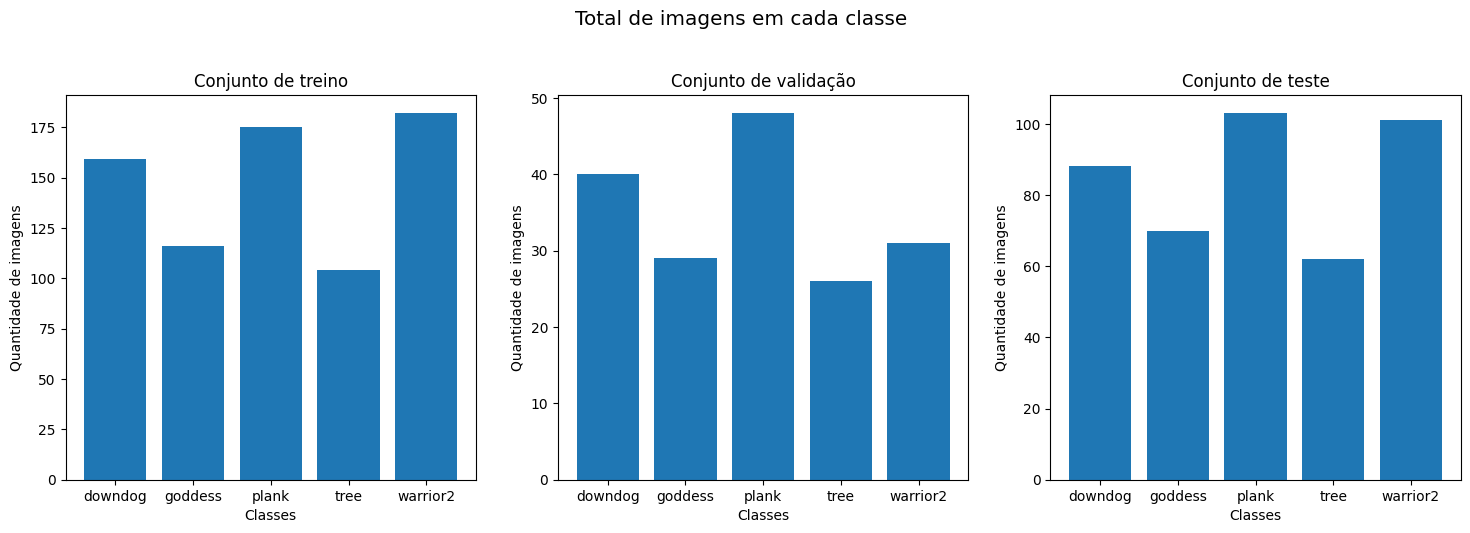

In [56]:
values_train = list(dataset_classes["TRAIN"].values())
values_val = list(dataset_classes["VAL"].values())
values_test = list(dataset_classes["TEST"].values())

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Total de imagens em cada classe", y=1.05, fontsize="x-large")

ax[0].set_title("Conjunto de treino")
ax[0].set_xlabel("Classes")
ax[0].set_ylabel("Quantidade de imagens")
ax[0].bar(range(len(dataset_classes["TRAIN"])), height=values_train, tick_label=class_names)

ax[1].set_title("Conjunto de validação")
ax[1].set_xlabel("Classes")
ax[1].set_ylabel("Quantidade de imagens")
ax[1].bar(range(len(dataset_classes["VAL"])), height=values_val, tick_label=class_names)

ax[2].set_title("Conjunto de teste")
ax[2].set_xlabel("Classes")
ax[2].set_ylabel("Quantidade de imagens")
ax[2].bar(range(len(dataset_classes["TEST"])), height=values_test, tick_label=class_names)

plt.show()